In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
from google.colab.patches import cv2_imshow
from os import listdir
from os.path import isfile, join

from sklearn.model_selection import train_test_split

# Load Dataset

In [3]:
!git clone https://github.com/seensiravit/Parkinson-Early-Detection.git

fatal: destination path 'Parkinson-Early-Detection' already exists and is not an empty directory.


In [4]:
PD_data_path = '/content/Parkinson-Early-Detection/dataset/HandPD/spiral/HealthySpiral'
H_data_path = '/content/Parkinson-Early-Detection/dataset/HandPD/spiral/HealthySpiral'

In [5]:
H_img = [H_data_path+'/'+f for f in listdir(H_data_path)]
PD_img = [PD_data_path+'/'+f for f in listdir(PD_data_path)]

In [6]:
print(H_img[:5])
print(PD_img[:5])

['/content/Parkinson-Early-Detection/dataset/HandPD/spiral/HealthySpiral/sp4-H17.jpg', '/content/Parkinson-Early-Detection/dataset/HandPD/spiral/HealthySpiral/sp1-H13.jpg', '/content/Parkinson-Early-Detection/dataset/HandPD/spiral/HealthySpiral/sp2-H20.jpg', '/content/Parkinson-Early-Detection/dataset/HandPD/spiral/HealthySpiral/sp4-H16.jpg', '/content/Parkinson-Early-Detection/dataset/HandPD/spiral/HealthySpiral/sp2-H14.jpg']
['/content/Parkinson-Early-Detection/dataset/HandPD/spiral/HealthySpiral/sp4-H17.jpg', '/content/Parkinson-Early-Detection/dataset/HandPD/spiral/HealthySpiral/sp1-H13.jpg', '/content/Parkinson-Early-Detection/dataset/HandPD/spiral/HealthySpiral/sp2-H20.jpg', '/content/Parkinson-Early-Detection/dataset/HandPD/spiral/HealthySpiral/sp4-H16.jpg', '/content/Parkinson-Early-Detection/dataset/HandPD/spiral/HealthySpiral/sp2-H14.jpg']


In [7]:
def display_image(path) :
  image = cv2.imread(path , 1)
  cv2_imshow(image)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

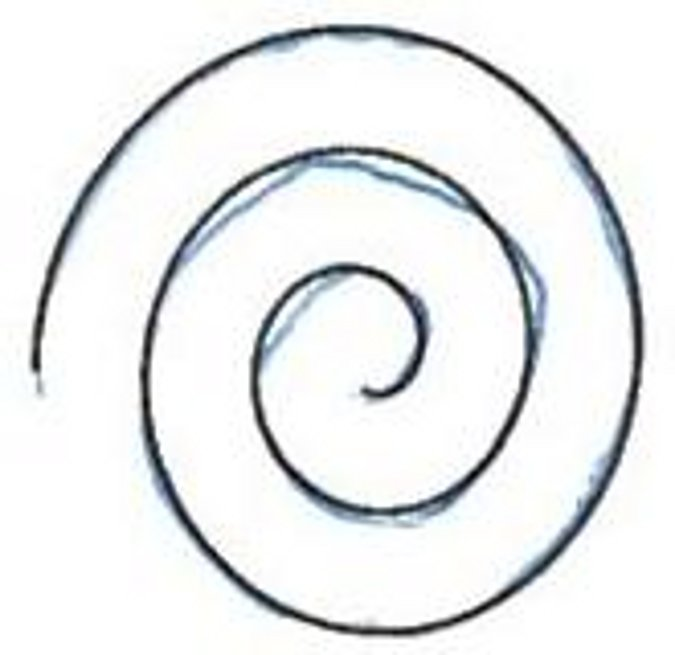

In [8]:
display_image(H_img[0])

# Create Dataframe (Image)

In [9]:
df_img = pd.concat([pd.DataFrame({'PNG':path , 'PD':0} for path in H_img) , pd.DataFrame({'PNG':path , 'PD':1} for path in PD_img)] , ignore_index=True)
df_img

,PNG,PD
0,/content/Parkinson-Early-Detection/dataset/Han...,0
1,/content/Parkinson-Early-Detection/dataset/Han...,0
2,/content/Parkinson-Early-Detection/dataset/Han...,0
3,/content/Parkinson-Early-Detection/dataset/Han...,0
4,/content/Parkinson-Early-Detection/dataset/Han...,0
...,...,...
275,/content/Parkinson-Early-Detection/dataset/Han...,1
276,/content/Parkinson-Early-Detection/dataset/Han...,1
277,/content/Parkinson-Early-Detection/dataset/Han...,1
278,/content/Parkinson-Early-Detection/dataset/Han...,1


In [10]:
df_img = df_img.sample(frac = 1)
df_img = df_img.reset_index()
df_img

,index,PNG,PD
0,164,/content/Parkinson-Early-Detection/dataset/Han...,1
1,62,/content/Parkinson-Early-Detection/dataset/Han...,0
2,94,/content/Parkinson-Early-Detection/dataset/Han...,0
3,182,/content/Parkinson-Early-Detection/dataset/Han...,1
4,155,/content/Parkinson-Early-Detection/dataset/Han...,1
...,...,...,...
275,122,/content/Parkinson-Early-Detection/dataset/Han...,0
276,69,/content/Parkinson-Early-Detection/dataset/Han...,0
277,151,/content/Parkinson-Early-Detection/dataset/Han...,1
278,110,/content/Parkinson-Early-Detection/dataset/Han...,0


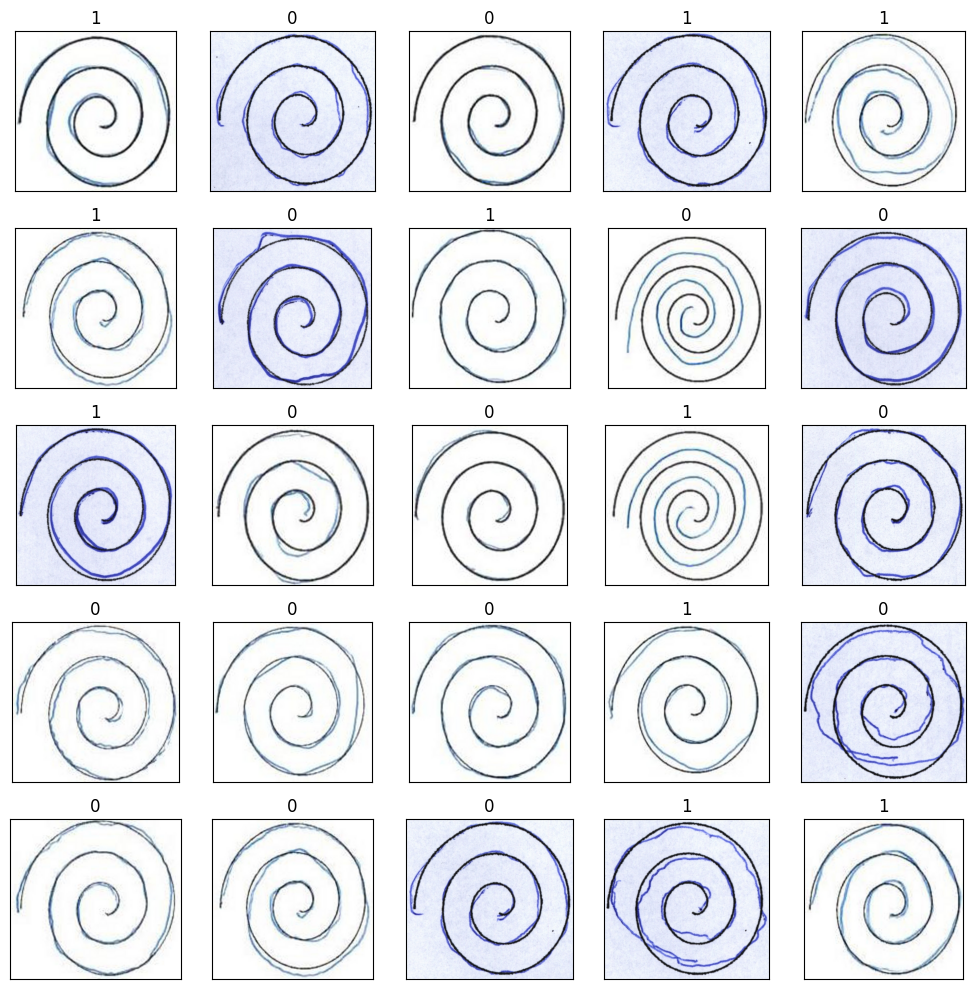

In [11]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_img["PNG"][i]))
    ax.set_title(df_img["PD"][i])
plt.tight_layout()
plt.show()

# Tranform data

In [12]:
path = df_img.loc[0 , 'PNG']
print(path)
# display_image(path)
val = cv2.imread(path)
print(val.shape)
# print(val)

/content/Parkinson-Early-Detection/dataset/HandPD/spiral/HealthySpiral/sp3-H20.jpg
(671, 675, 3)


In [13]:
x = df_img['PNG'].apply(lambda path : cv2.imread(path)) / 255.

In [14]:
dummy = x.loc[0]
print(dummy.shape)
# print(dummy)

(671, 675, 3)


In [15]:
y = df_img['PD']
y.head()

0    1
1    0
2    0
3    1
4    1
Name: PD, dtype: int64

# split data

In [16]:
print(x.shape , y.shape)

(280,) (280,)


In [17]:
x_train_valid , x_test , y_train_valid , y_test = train_test_split(x,y,test_size=0.08,random_state=1)
x_train , x_valid , y_train , y_valid = train_test_split(x_train_valid , y_train_valid , test_size=0.06,random_state=1)

In [18]:
print(f'train size : x {x_train.shape} , y {y_train.shape}')
print(f'valid size : x {x_valid.shape} , y {y_valid.shape}')
print(f'test size : x {x_test.shape} , y {y_test.shape}')

train size : x (241,) , y (241,)
valid size : x (16,) , y (16,)
test size : x (23,) , y (23,)


# VGG 16

source code : https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/

In [19]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers
import tensorflow as tf

In [20]:
base_model = VGG16(input_shape = (635,675,3), # Shape of our images
                    include_top = False, # Leave out the last fully connected layer
                    weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

In [21]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

# Train

In [22]:
history  = model.fit(x_train , y_train , epochs=30 , validation_data=(x_valid , y_valid))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).